<h1 align="center">Алгоритм линейной регрессии. Градиентный спуск</h1>

In [1]:
# подключение библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', -1)

In [2]:
# исходные данные
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
# функция для подсчета среднеквадратической ошибки
def mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
# начальные веса
W = np.array([1, 0.5])

1. Подберите скорость обучения (eta) и количество итераций

In [5]:
n = X.shape[0]

eta = 0.01
n_iter = 10

W = np.array([1, 0.5])

print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')


for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
    print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.098 4.34 ], MSE = 3150.55
Iteration #1: W_new = [2.86676364 6.58410909], MSE = 1832.61
Iteration #2: W_new = [3.4991438 8.0926519], MSE = 1310.19
Iteration #3: W_new = [4.03774199 9.10042438], MSE = 1060.68
Iteration #4: W_new = [4.51157808 9.76732546], MSE = 937.87
Iteration #5: W_new = [ 4.94042255 10.20224788], MSE = 873.93
Iteration #6: W_new = [ 5.3377468  10.47934821], MSE = 837.41
Iteration #7: W_new = [ 5.71273241 10.64912712], MSE = 813.72
Iteration #8: W_new = [ 6.07163943 10.74597515], MSE = 796.1
Iteration #9: W_new = [ 6.41873825 10.79331159], MSE = 781.39


In [6]:
# Функция для нахождения минимальной ошибки при обучении линейной модели при заданных гиперпараметрах
def search_params_with_min_mse(eta, n_iter):
    errors = []
    
    W = np.array([1, 0.5])
    for i in range(n_iter):
        y_pred = np.dot(X, W)
        err = mse(y, y_pred)
        errors.append(err)
        for k in range(W.shape[0]):
            W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
        if i % 10 == 0:
            eta /= 1.1
    return np.min(errors)

In [7]:
# Генерация списков с различными значениями гиперпараметров
eta_list = np.linspace(0.001, 0.03, 30)
n_iter_list = np.arange(10, 3000, 300)

In [8]:
# Создадим Датафрейм, который заполним данными о полученных минимальных значениях потерь mse с заданными гиперпараметрами
df = pd.DataFrame({}, columns = ['eta', 'n_iter', 'min_mse'])

for eta in eta_list:
    for n_iter in n_iter_list:
        df = df.append({'eta': eta, 'n_iter': n_iter, 'min_mse': search_params_with_min_mse(eta, n_iter)}, ignore_index=True)

In [9]:
df.shape

(300, 3)

In [10]:
df.head()

,eta,n_iter,min_mse
0,0.001,10.0,2134.456892
1,0.001,310.0,765.170200
2,0.001,610.0,757.866515
3,0.001,910.0,757.457373
4,0.001,1210.0,757.433953


In [11]:
print(f"Минимальное значение ошибки равно {df['min_mse'].min()}")

Минимальное значение ошибки равно 46.66333157445921


In [12]:
# Отсортируем список по убыванию минимальных ошибок и количества итераций 
df_sorted = df.sort_values(by=['min_mse', 'n_iter'])
df_sorted.head(30)

,eta,n_iter,min_mse
299,0.030,2710.0,46.663332
298,0.030,2410.0,46.663332
297,0.030,2110.0,46.663332
296,0.030,1810.0,46.663332
295,0.030,1510.0,46.663342
294,0.030,1210.0,46.663511
293,0.030,910.0,46.666470
292,0.030,610.0,46.718527
289,0.029,2710.0,47.337347
288,0.029,2410.0,47.337347


<i>Наиболее оптимальными параметрами оказалась пара eta = 0.03 и n_iter = 1810. Хоть в частичных случаях достигается незначительно лучшая оптимизация mse, но при этом сильно возрастает количество итераций для подбора весов уравнения линейной регрессии.</i>

In [13]:
n = X.shape[0]

eta = 0.03
n_iter = 1810

W = np.array([1, 0.5])

print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

errors = []
for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = mse(y, y_pred)
    errors.append(err)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1

print(f'Final weights =  {W}')

Number of objects = 10        
Learning rate = 0.03        
Initial weights = [1.  0.5] 

Final weights =  [43.02170904  4.39136672]


Text(0, 0.5, 'MSE')

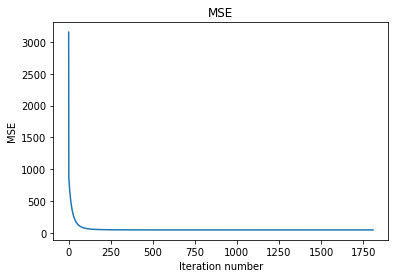

In [14]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [15]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИСХОДНЫЙ ВАРИАНТ
#     W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
    print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.098 4.34 ], MSE = 3150.55
Iteration #1: W_new = [2.86676364 6.58410909], MSE = 1832.61
Iteration #2: W_new = [3.4991438 8.0926519], MSE = 1310.19
Iteration #3: W_new = [4.03774199 9.10042438], MSE = 1060.68
Iteration #4: W_new = [4.51157808 9.76732546], MSE = 937.87
Iteration #5: W_new = [ 4.94042255 10.20224788], MSE = 873.93
Iteration #6: W_new = [ 5.3377468  10.47934821], MSE = 837.41
Iteration #7: W_new = [ 5.71273241 10.64912712], MSE = 813.72
Iteration #8: W_new = [ 6.07163943 10.74597515], MSE = 796.1
Iteration #9: W_new = [ 6.41873825 10.79331159], MSE = 781.39
Iteration #10: W_new = [ 6.75694419 10.8070841 ], MSE = 768.15
Iteration #11: W_new = [ 7.05813103 10.79896407], MSE = 755.7
Iteration #12: W_new = [ 7.35474222 10.77819081], MSE = 744.79
Iteration #13: W_new = [ 7.64748082 10.74854667], MSE = 734.15
Iteration #14: W_new = [ 7.93685072 10.71271632], MSE = 72